# Optimization of a Voigt profile using JAXopt

Currently, JAXopt will not be installed automatically. Install JAXopt by pip and so on. 

In [1]:
from exojax.spec.rlpf import rvoigt
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jaxopt

Let's optimize the Voigt function $V(\nu, \beta, \gamma_L)$ using exojax!
$V(\nu, \beta, \gamma_L)$ is a convolution of a Gaussian with a STD of $\beta$ and a Lorentian with a gamma parameter of $\gamma_L$. 

Note that we use spec.rlpf.rvoigt instead of spec.voigt. This function is a voigt profile with VJP while voigt is JVP defined one. For some reason, we do not use rvoigt as a default function of the voigt profile. But in future, we plan to replace the VJP version as a default one. 


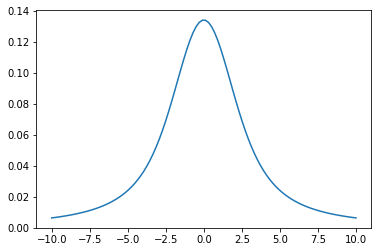

In [2]:
nu=jnp.linspace(-10,10,100)
plt.plot(nu, rvoigt(nu,1.0,2.0)) #beta=1.0, gamma_L=2.0

## optimization of a simple absorption model

Next, we try to fit a simple absorption model to mock data.
The absorption model is 

$ f= e^{-a V(\nu,\beta,\gamma_L)}$


In [3]:
def absmodel(nu,a,beta,gamma_L):
    return jnp.exp(-a*rvoigt(nu,beta,gamma_L))

Adding a noise...


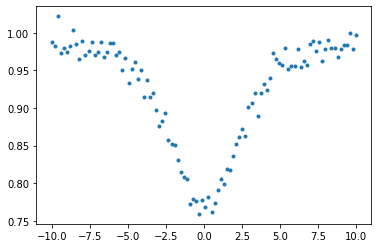

In [4]:
from numpy.random import normal
data=absmodel(nu,2.0,1.0,2.0)+normal(0.0,0.01,len(nu))
plt.plot(nu,data,".")

Let's optimize the multiple parameters

In [5]:
from jax import grad, vmap

We define the objective function as $obj = |d - f|^2$

In [6]:
# loss or objective function
def objective(params):
    a,beta,gamma_L=params
    f=data-absmodel(nu,a,beta,gamma_L)
    g=jnp.dot(f,f)
    return g


In [7]:
# Gradient Descent

In [30]:
gd = jaxopt.GradientDescent(fun=objective, maxiter=10)
res = gd.run(init_params=(1.5,0.7,1.5))
params, state = res

In [31]:
params

(DeviceArray(1.9528606, dtype=float32),
 DeviceArray(1.0811585, dtype=float32),
 DeviceArray(1.9142631, dtype=float32))

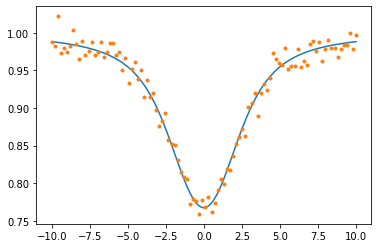

In [32]:
from numpy.random import normal
model=absmodel(nu,params[0],params[1],params[2])
plt.plot(nu,model)
plt.plot(nu,data,".")

In [10]:
#NCG

In [26]:
gd = jaxopt.NonlinearCG(fun=objective, maxiter=10)
res = gd.run(init_params=(1.5,0.7,1.5))
params, state = res

In [27]:
params

(DeviceArray(1.9489672, dtype=float32),
 DeviceArray(1.0880172, dtype=float32),
 DeviceArray(1.9028362, dtype=float32))

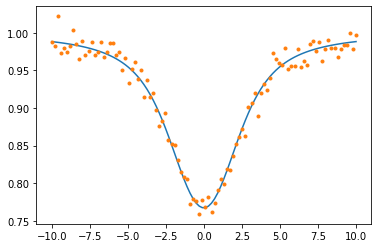

In [28]:
from numpy.random import normal
model=absmodel(nu,params[0],params[1],params[2])
plt.plot(nu,model)
plt.plot(nu,data,".")